In [1]:
!pip install -q gdown

# kalian download semua file dari gdrive dibawah lalu buat folder (ex. midterm_folder)
!gdown --folder 1JvI5xhPfN3VmjpWYZk9fCHG41xG697um -O midterm_folder

Retrieving folder contents
Processing file 1ALveidCmKzk4p_liQ7b663BXL0PcTaFN test_transaction.csv
Processing file 1Ujh37a1kTarNf3dSOSrj-hKDswULebYA train_transaction.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN
From (redirected): https://drive.google.com/uc?id=1ALveidCmKzk4p_liQ7b663BXL0PcTaFN&confirm=t&uuid=20284541-6db1-45b2-8496-43b10d530907
To: /kaggle/working/midterm_folder/test_transaction.csv
100%|█████████████████████████████████████████| 613M/613M [00:02<00:00, 246MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA
From (redirected): https://drive.google.com/uc?id=1Ujh37a1kTarNf3dSOSrj-hKDswULebYA&confirm=t&uuid=415557f8-1a43-430a-903f-35e6a44295e9
To: /kaggle/working/midterm_folder/train_transaction.csv
100%|█████████████████████████████████████████| 683M/683M [00:04<

In [2]:
import pandas as pd
import polars as pl

BASE_PATH = "midterm_folder"

train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv")
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv")

print(train_transaction.shape) #590540 row dan 393 feature + 1 target
print(test_transaction.shape) #506691 row dan 393 feature

(590540, 394)
(506691, 393)


In [3]:
train_transaction.head() #isFraud adalah target featurenya

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2987000,0,86400,68.5,"""W""",13926,null,150.0,"""discover""",142.0,"""credit""",315.0,87.0,19.0,null,null,null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,null,13.0,null,null,null,…,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987001,0,86401,29.0,"""W""",2755,404.0,150.0,"""mastercard""",102.0,"""credit""",325.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987002,0,86469,59.0,"""W""",4663,490.0,150.0,"""visa""",166.0,"""debit""",330.0,87.0,287.0,null,"""outlook.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,null,null,0.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987003,0,86499,50.0,"""W""",18132,567.0,150.0,"""mastercard""",117.0,"""debit""",476.0,87.0,null,null,"""yahoo.com""",null,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,null,…,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2987004,0,86506,50.0,"""H""",4497,514.0,150.0,"""mastercard""",102.0,"""credit""",420.0,87.0,null,null,"""gmail.com""",null,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,null,null,null,null,null,…,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_transaction.head() #uji data baru, setelah pembuatan model machine learningnya

TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,…,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
i64,i64,f64,str,i64,f64,f64,str,f64,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
3663549,18403224,31.95,"""W""",10409,111.0,150.0,"""visa""",226.0,"""debit""",170.0,87.0,1.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,null,null,…,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663550,18403263,49.0,"""W""",4272,111.0,150.0,"""visa""",226.0,"""debit""",299.0,87.0,4.0,null,"""aol.com""",null,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,null,null,…,0.0,0.0,1.0,0.0,280.0,77.0,0.0,280.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663551,18403310,171.0,"""W""",4476,574.0,150.0,"""visa""",226.0,"""debit""",472.0,87.0,2635.0,null,"""hotmail.com""",null,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,null,null,…,0.0,0.0,1.0,0.0,1321.0,0.0,0.0,1058.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663552,18403310,284.95,"""W""",10989,360.0,150.0,"""visa""",166.0,"""debit""",205.0,87.0,17.0,null,"""gmail.com""",null,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,null,null,…,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
3663553,18403317,67.95,"""W""",18018,452.0,150.0,"""mastercard""",117.0,"""debit""",264.0,87.0,6.0,null,"""gmail.com""",null,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,null,null,…,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


Library Library Import

In [5]:
!pip install --upgrade protobuf==3.20.*


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tens

In [7]:
# =========================================================
# 1. Libraries
# =========================================================
import pandas as pd
import numpy as np
import polars as pl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from tensorflow.keras import layers, models

BASE_PATH = "midterm_folder"

In [8]:
# =========================================================
# 2. Load Data
# =========================================================
train_transaction = pl.read_csv(f"{BASE_PATH}/train_transaction.csv").to_pandas()
test_transaction  = pl.read_csv(f"{BASE_PATH}/test_transaction.csv").to_pandas()

print("Train shape:", train_transaction.shape)
print("Test shape:", test_transaction.shape)

Train shape: (590540, 394)
Test shape: (506691, 393)


In [9]:
# =========================================================
# 3. Drop columns with too many missing values
# =========================================================
def drop_missing(df, thresh=0.7):
    missing_ratio = df.isnull().mean()
    to_drop = missing_ratio[missing_ratio > thresh].index.tolist()
    return df.drop(columns=to_drop), to_drop

train_transaction, dropped_cols = drop_missing(train_transaction)
test_transaction = test_transaction.drop(columns=dropped_cols, errors='ignore')

print("Dropped columns:", len(dropped_cols))

Dropped columns: 168


In [10]:
# =========================================================
# 4. Fill missing values 
# =========================================================
# Separate target before filling
target = "isFraud"

num_cols = train_transaction.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = train_transaction.select_dtypes(include=["object"]).columns.tolist()

# Make sure "isFraud" is not included in numeric processing
if target in num_cols:
    num_cols.remove(target)

# Numeric fill strategies
for c in num_cols:
    med = train_transaction[c].median()
    train_transaction[c] = train_transaction[c].fillna(med)
    if c in test_transaction.columns:
        test_transaction[c] = test_transaction[c].fillna(med)

# Categorical fill strategies
for c in cat_cols:
    mode = train_transaction[c].mode()[0]
    train_transaction[c] = train_transaction[c].fillna(mode)
    if c in test_transaction.columns:
        test_transaction[c] = test_transaction[c].fillna(mode)

In [11]:
# =========================================================
# 5. One-hot encode categorical variables
# =========================================================
train_transaction = pd.get_dummies(train_transaction, columns=cat_cols)
test_transaction  = pd.get_dummies(test_transaction, columns=cat_cols)

# Align columns
train_cols = train_transaction.columns
test_transaction = test_transaction.reindex(columns=train_cols, fill_value=0)

# Drop target from test
test_transaction = test_transaction.drop(columns=[target], errors='ignore')

In [12]:
# =========================================================
# 6. Split X, y
# =========================================================
y = train_transaction[target].astype(int).values
X = train_transaction.drop(columns=[target]).values

# Scale test data
X_test = test_transaction.values

In [13]:
# =========================================================
# 7. Scaling
# =========================================================
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [14]:
# =========================================================
# 8. Train-test split
# =========================================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
from sklearn.utils import class_weight
import numpy as np

# Calculate the required weights based on the training target set
weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weights[i] for i in range(len(weights))}

print(f"Calculated Class Weights: {class_weights}")

Calculated Class Weights: {0: 0.5181288961224123, 1: 14.290139140955837}


In [16]:
# =========================================================
# 9. Deep Neural Network
# =========================================================
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=[tf.keras.metrics.AUC(name="auc")]
)

model.summary()

I0000 00:00:1764836083.314068      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764836083.314590      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       155,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,001 (1.22 MB)

 Trainable params: 320,001 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# =========================================================
# 10. Callbacks
# =========================================================
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_auc", patience=5, mode="max", restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", patience=3, factor=0.5, mode="max"
    )
]

In [18]:
# Assuming you have the training target variable 'y_train'
from sklearn.utils import class_weight
import numpy as np

# Calculate the required weights
weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: weights[i] for i in range(len(weights))}

# Print the resulting weights (The weight for class 1 will be much higher)
print(f"Class Weights: {class_weights}")

Class Weights: {0: 0.5181288961224123, 1: 14.290139140955837}


In [19]:
# =========================================================
# 11. Train
# =========================================================
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=4096,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/40


I0000 00:00:1764836103.025540     137 service.cc:148] XLA service 0x784ef804a8c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764836103.026798     137 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764836103.026818     137 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764836103.438002     137 cuda_dnn.cc:529] Loaded cuDNN version 90300


 24/116 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - auc: 0.5028 - loss: 0.3773

I0000 00:00:1764836106.407986     137 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


116/116 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - auc: 0.6657 - loss: 0.2141 - val_auc: 0.8555 - val_loss: 0.1122 - learning_rate: 0.0010
Epoch 2/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.8438 - loss: 0.1138 - val_auc: 0.8720 - val_loss: 0.1047 - learning_rate: 0.0010
Epoch 3/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.8620 - loss: 0.1059 - val_auc: 0.8832 - val_loss: 0.1007 - learning_rate: 0.0010
Epoch 4/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.8722 - loss: 0.1019 - val_auc: 0.8911 - val_loss: 0.0959 - learning_rate: 0.0010
Epoch 5/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.8844 - loss: 0.0973 - val_auc: 0.8976 - val_loss: 0.0938 - learning_rate: 0.0010
Epoch 6/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.8895 - loss: 0.0947 - val_auc: 0.9034 - val_loss: 0.0914 - learning_rate: 0.0010
Epoch 7/40
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.8975 - loss: 0.0913 - val_auc: 0.9065 - val_loss: 0.0904 - learning_rate: 0.0010
Epoch 8/40
116/

In [20]:
# =========================================================
# 12. Evaluate
# =========================================================
val_pred = model.predict(X_val)
auc_score = roc_auc_score(y_val, val_pred)
print("Validation AUC:", auc_score)

3691/3691 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Validation AUC: 0.9344436635202611


In [21]:
# =========================================================
# 13. Predict Test
# =========================================================
test_pred = model.predict(X_test)

submission = pd.DataFrame({
    "TransactionID": np.arange(len(test_pred)),
    "isFraud": test_pred.flatten()
})

submission.to_csv("submission.csv", index=False)
print("Saved submission.csv")


15835/15835 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
Saved submission.csv


In [24]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# 1. Predict probabilities
val_pred_prob = model.predict(X_val)

# 2. Convert probabilities → class (threshold default 0.5)
optimal_threshold = 0.15

val_pred = (val_pred_prob > optimal_threshold).astype(int)

# 3. METRICS
acc = accuracy_score(y_val, val_pred)
prec = precision_score(y_val, val_pred, zero_division=0)
rec = recall_score(y_val, val_pred, zero_division=0)
f1 = f1_score(y_val, val_pred, zero_division=0)
auc = roc_auc_score(y_val, val_pred_prob)

cm = confusion_matrix(y_val, val_pred)
report = classification_report(y_val, val_pred)

print("=== MODEL EVALUATION METRICS ===")
print(f"Accuracy:          {acc:.4f}")
print(f"Precision:         {prec:.4f}")
print(f"Recall:            {rec:.4f}")
print(f"F1 Score:          {f1:.4f}")
print(f"ROC AUC:           {auc:.4f}")

print("\n=== CONFUSION MATRIX ===")
print(cm)

print("\n=== CLASSIFICATION REPORT ===")
print(report)


3691/3691 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
=== MODEL EVALUATION METRICS ===
Accuracy:          0.9691
Precision:         0.5470
Recall:            0.6784
F1 Score:          0.6057
ROC AUC:           0.9344

=== CONFUSION MATRIX ===
[[111653   2322]
 [  1329   2804]]

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    113975
           1       0.55      0.68      0.61      4133

    accuracy                           0.97    118108
   macro avg       0.77      0.83      0.79    118108
weighted avg       0.97      0.97      0.97    118108



In [25]:
# ================================
# CALCULATE PREDICTIONS
# ================================
y_pred_prob = model.predict(X_val).reshape(-1)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Predictions ready:")
print("y_pred_prob:", y_pred_prob[:5])
print("y_pred:", y_pred[:5])


3691/3691 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Predictions ready:
y_pred_prob: [1.1031775e-02 2.1680173e-02 6.8088826e-05 3.2217219e-03 1.0205904e-02]
y_pred: [0 0 0 0 0]


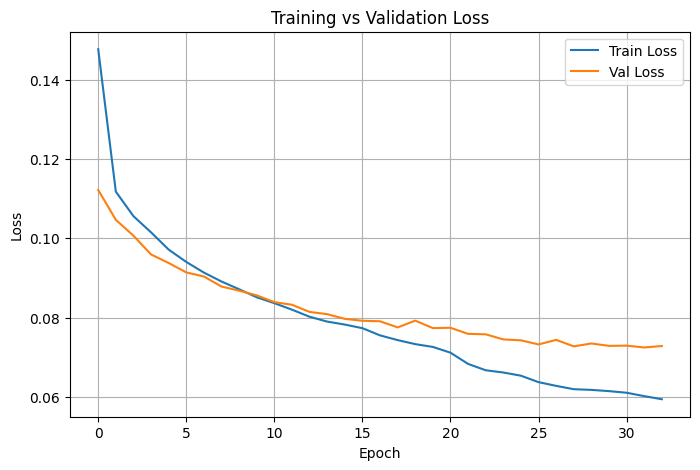

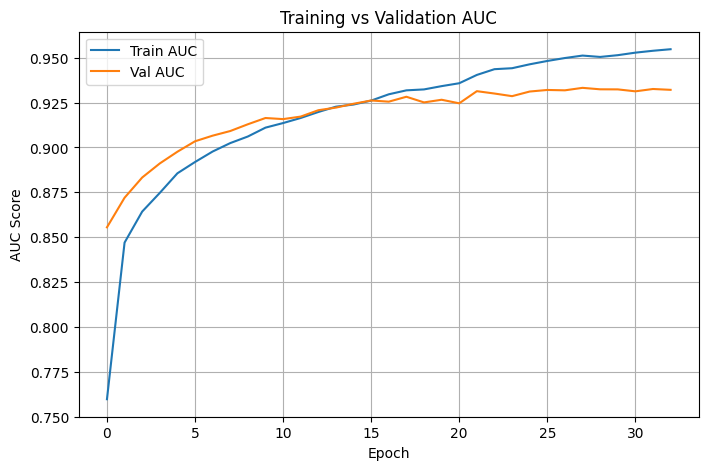

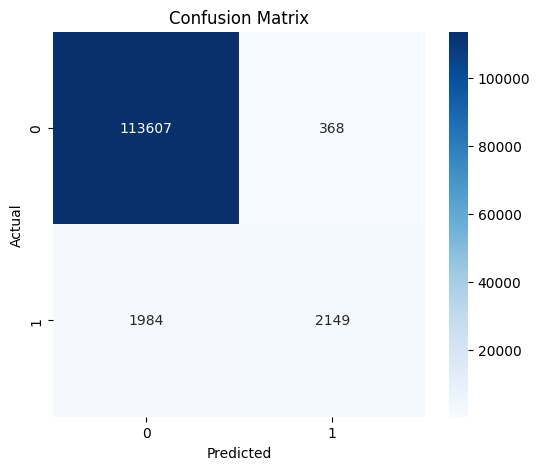

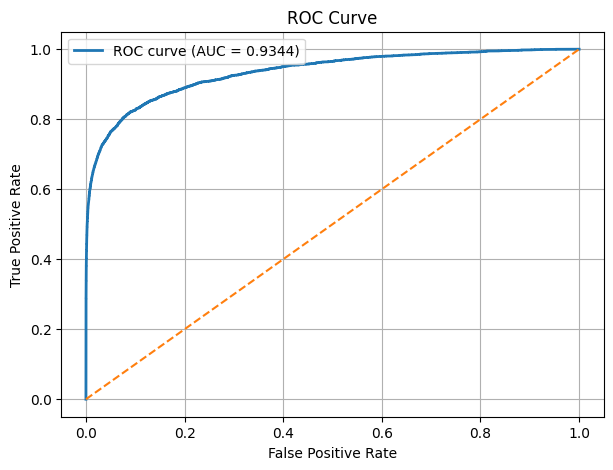

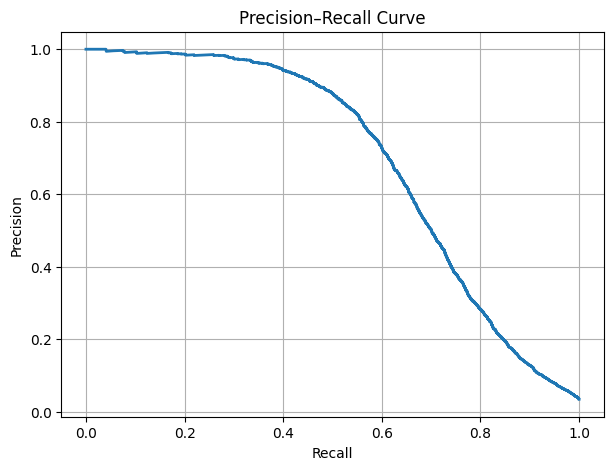

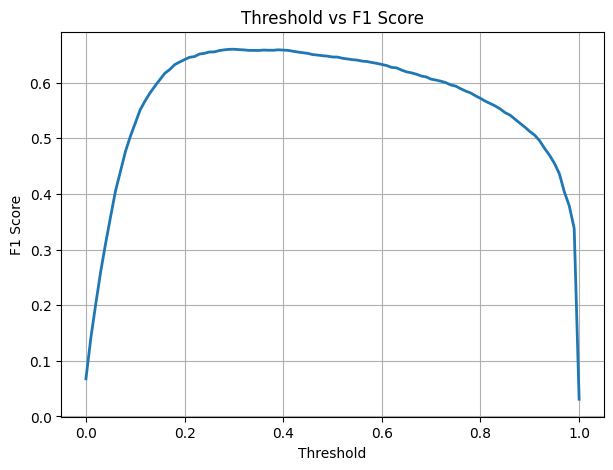

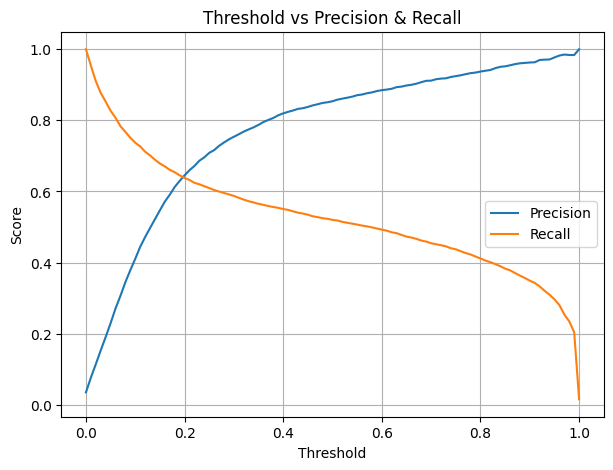

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, 
    precision_recall_curve, f1_score, accuracy_score,
    precision_score, recall_score
)
import numpy as np


# ============================================================
# 1. TRAINING HISTORY PLOTS
# ============================================================

history_dict = history.history

plt.figure(figsize=(8,5))
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history_dict['auc'], label='Train AUC')
plt.plot(history_dict['val_auc'], label='Val AUC')
plt.title('Training vs Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC Score')
plt.legend()
plt.grid()
plt.show()


# ============================================================
# 2. CONFUSION MATRIX VISUAL
# ============================================================

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ============================================================
# 3. ROC CURVE
# ============================================================

fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, lw=2, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


# ============================================================
# 4. PRECISION-RECALL CURVE
# ============================================================

precision, recall, _ = precision_recall_curve(y_val, y_pred_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid()
plt.show()


# ============================================================
# 5. THRESHOLD TUNING — F1 Curve
# ============================================================

thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    pred_t = (y_pred_prob >= t).astype(int)
    f1_scores.append(f1_score(y_val, pred_t))

plt.figure(figsize=(7,5))
plt.plot(thresholds, f1_scores, lw=2)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("Threshold vs F1 Score")
plt.grid()
plt.show()


# ============================================================
# 6. Threshold vs Precision & Recall
# ============================================================

precisions = []
recalls = []

for t in thresholds:
    pred_t = (y_pred_prob >= t).astype(int)
    precisions.append(precision_score(y_val, pred_t))
    recalls.append(recall_score(y_val, pred_t))

plt.figure(figsize=(7,5))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold vs Precision & Recall")
plt.legend()
plt.grid()
plt.show()
